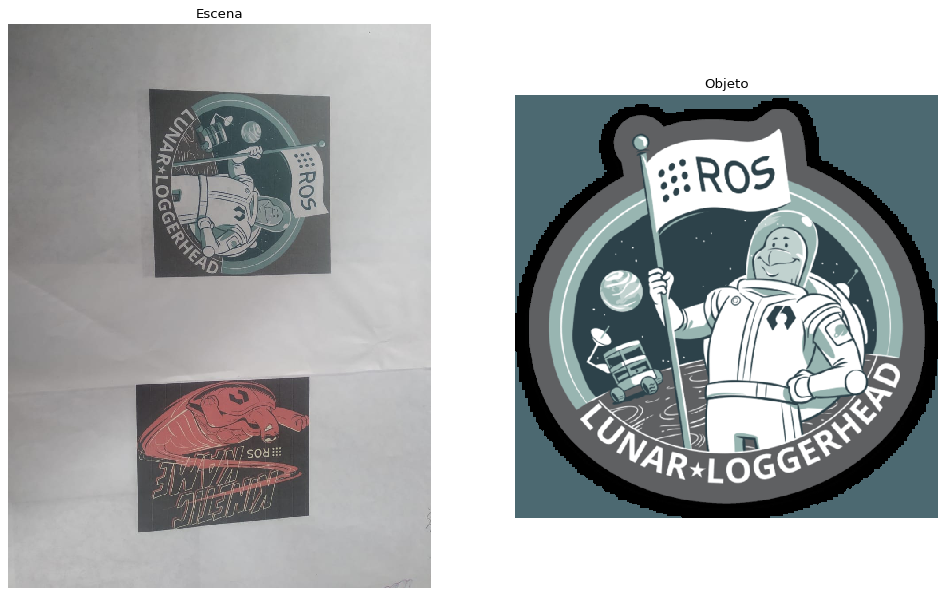

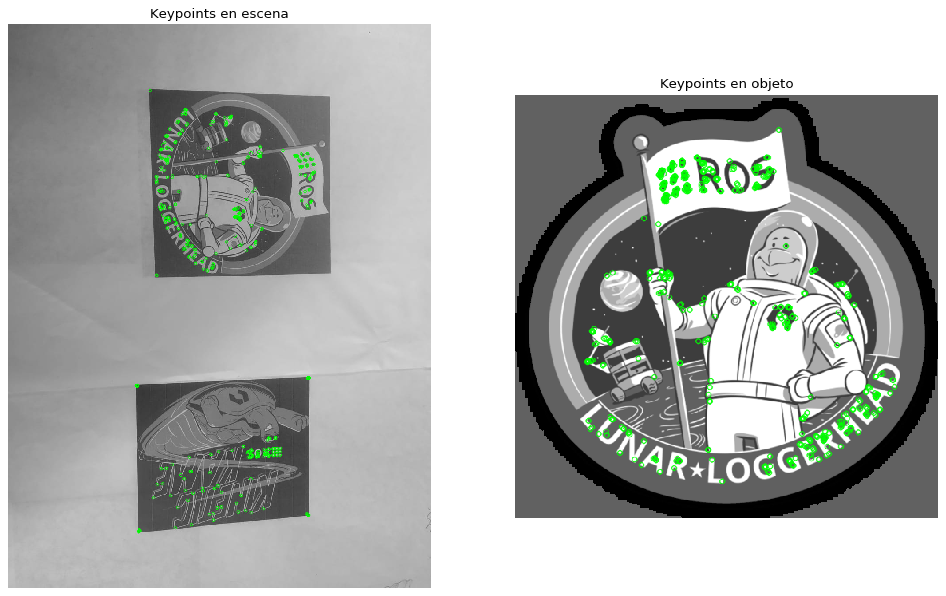

Matches:  49
Matriz de transformacion obtenida usando OpenCV: 
 [[ 5.18597553e-02 -9.41936923e-01  7.60871417e+02]
 [ 9.31447170e-01 -6.18553032e-02  1.29806053e+02]
 [ 7.24365052e-05 -1.45737671e-04  1.00000000e+00]] 



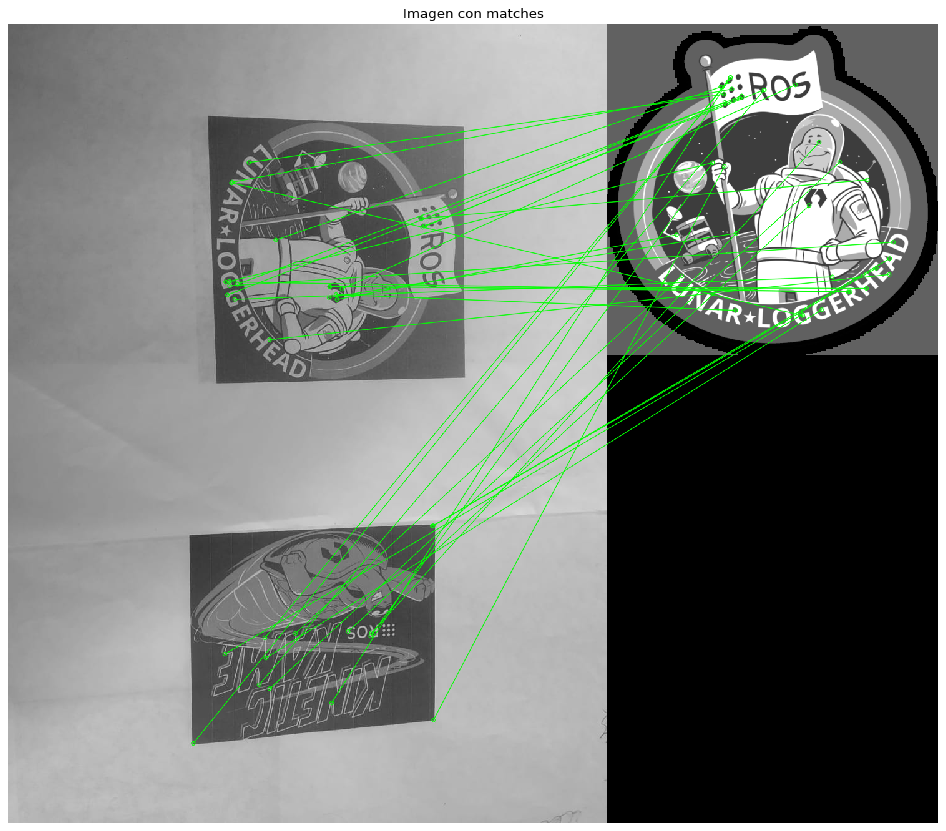

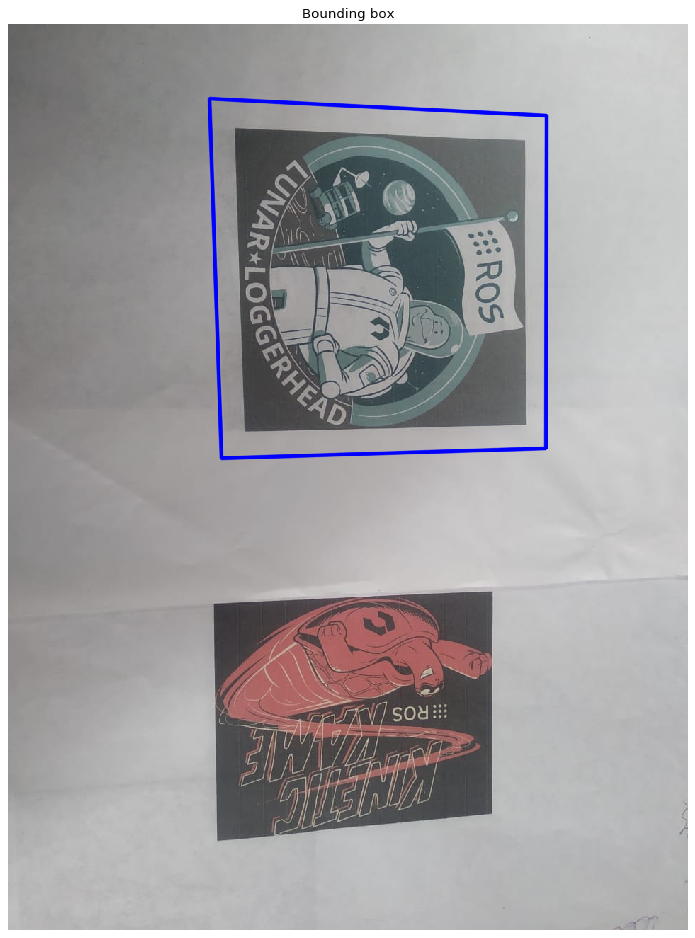

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar ambas imagenes
imgScene  = cv2.imread('imgs/Photo1.jpg')          # Scene
imgObject = cv2.imread('imgs/lunar_sticker.png')   # Object
imgScene  = cv2.cvtColor(imgScene,cv2.COLOR_BGR2RGB)
imgObject = cv2.cvtColor(imgObject,cv2.COLOR_BGR2RGB)

# Mostrar ambas imagenes
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1),plt.imshow(imgScene), plt.title('Escena')
plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(imgObject), plt.title('Objeto')
plt.axis('off') 
plt.show()

# Cambiar a escala de grises para hallar los keypoints
img1_Scene = cv2.cvtColor(imgScene,cv2.COLOR_RGB2GRAY)
img2_Object = cv2.cvtColor(imgObject,cv2.COLOR_RGB2GRAY)

# Se crea el objeto del descriptor
orb = cv2.ORB_create()

# Se calculan los keypoints y las features
kp1_Scene, des1_Scene = orb.detectAndCompute(img1_Scene,None)
kp2_Object, des2_Object = orb.detectAndCompute(img2_Object,None)

# Se dibujan en la imagen los keypoints hallados
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
img1_kp_draw = cv2.drawKeypoints(img1_Scene.copy(), kp1_Scene, None, color=(0,255,0), flags=0)
plt.subplot(1,2,1),plt.imshow(img1_kp_draw), plt.title('Keypoints en escena')
plt.axis('off')

img2_kp_draw = cv2.drawKeypoints(img2_Object.copy(), kp2_Object, None, color=(0,255,0), flags=0)
plt.subplot(1,2,2),plt.imshow(img2_kp_draw), plt.title('Keypoints en objeto')
plt.axis('off') 
 
plt.show()


# Crear el objeto para la comparacion de matrices de caracteristicas
# se utiliza el algoritmo de BruteForce
matcher = cv2.BFMatcher()

# Se comparan los vectores de caracteristicas teniendo en cuenta los dos
# vecinos mas cercanos
matches = matcher.knnMatch(des2_Object, des1_Scene, k=2) 

# Se realiza un recorrido de las parejas de vectores caracteristicas
# para rechazar aquellos que estan demasiado lejos entre si
good = []
FACT_DIST = 0.8
for m,n in matches:
    if m.distance < FACT_DIST*n.distance:
        good.append(m)
        
print("Matches: ", len(good))

# Se organizan de forma que los matches mas parecidos esten al principio
matches_sorted = sorted(good, key = lambda x:x.distance)

# Si el numero de parejas de caracteristicas supera un umbral se halla la matriz
# para despues realizar la transformacion de perspectiva
MIN_MATCH_COUNT = 10
M = None
if len(matches_sorted) > MIN_MATCH_COUNT:
    
    # Se hallan los puntos de los descriptores en las parejas en el objeto
    src_pts = np.float32([ kp2_Object[m.queryIdx].pt for m in matches_sorted ]).reshape(-1,1,2) # Object points
    
    # Se hallan los puntos de los descriptores en las parejas en la escena
    dst_pts = np.float32([ kp1_Scene[m.trainIdx].pt for m in matches_sorted ]).reshape(-1,1,2) # Desired points
    
    # Con los anteriores dos arreglos se procede a calcular la matriz de
    # homografia usando la tecnica RANSAC (Random Sample Consensus) debido 
    # a que los puntos en los arreglos tienen coordenadas atipicas (outliers), 
    # es decir que algunos estan muy lejos del resto.
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
else:
    print("Not enought matches are found")

if (M is not None):
    print("Matriz de transformacion obtenida usando OpenCV: \n", M,"\n")
    
    # Se hallan puntos para realizar la homografia
    h,w = img2_Object.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    #print("Height: ", h, " Width: ", w, " Points: \n", pts)
    
    # Se realiza la homografia o transformacion de perspectiva
    dst = cv2.perspectiveTransform(pts,M)
    
    # La mascara es un arreglo en el cual se encuentran los matches aceptados
    matchesMask = mask.ravel().tolist()
    
    # Se dibujan los matches obtenidos
    img_res = cv2.drawMatches(img1_Scene, kp1_Scene, img2_Object, kp2_Object, matches_sorted, None,matchColor = (0,255,0),
               singlePointColor = None,
               matchesMask = matchesMask, # Dibujar solo inliers
               flags = 2)
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img_res), plt.title('Imagen con matches')
    plt.axis('off') 
    plt.show()
    
    # Se dibuja el bounding box
    img_box = cv2.polylines(imgScene, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)

    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img_box), plt.title('Bounding box')
    plt.axis('off') 
    plt.show()


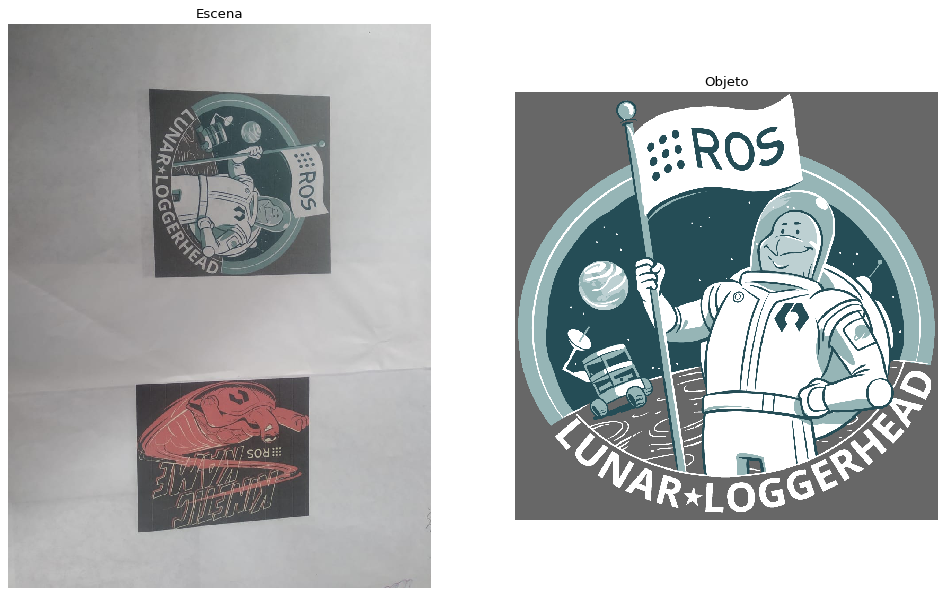

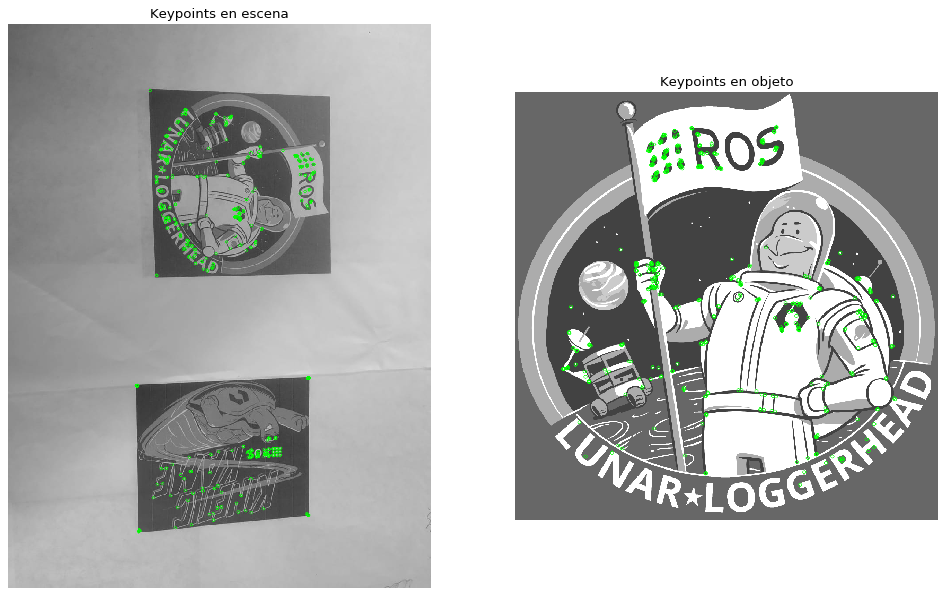

Matches:  39
Matriz de transformacion obtenida usando OpenCV: 
 [[ 2.19509694e-02 -5.27805176e-01  7.29523711e+02]
 [ 5.22099390e-01 -2.94764452e-02  1.63915132e+02]
 [ 2.58398696e-05 -6.74669928e-05  1.00000000e+00]] 



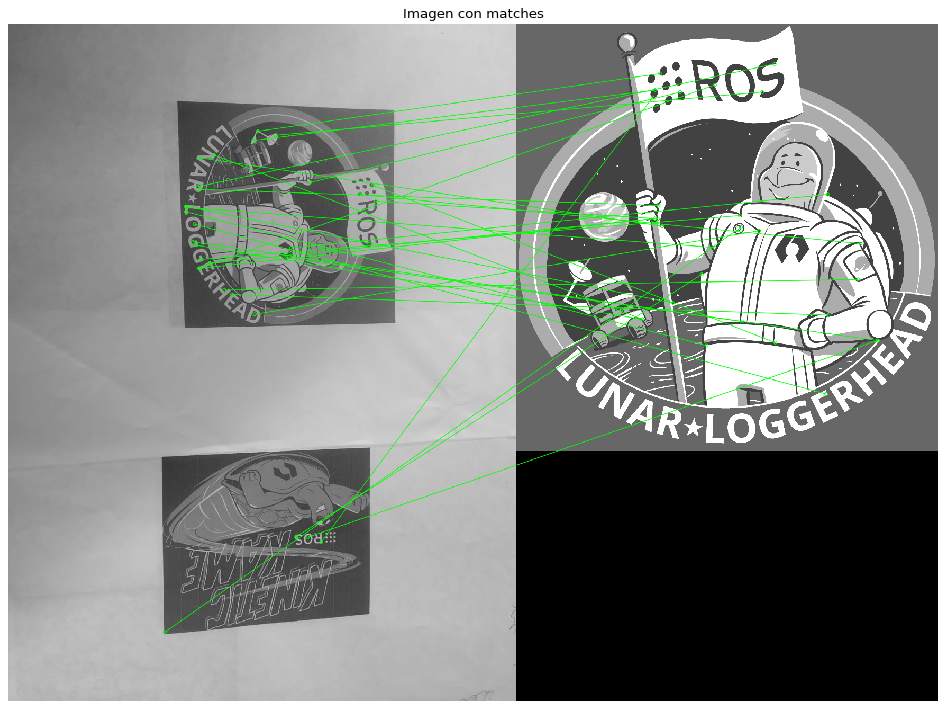

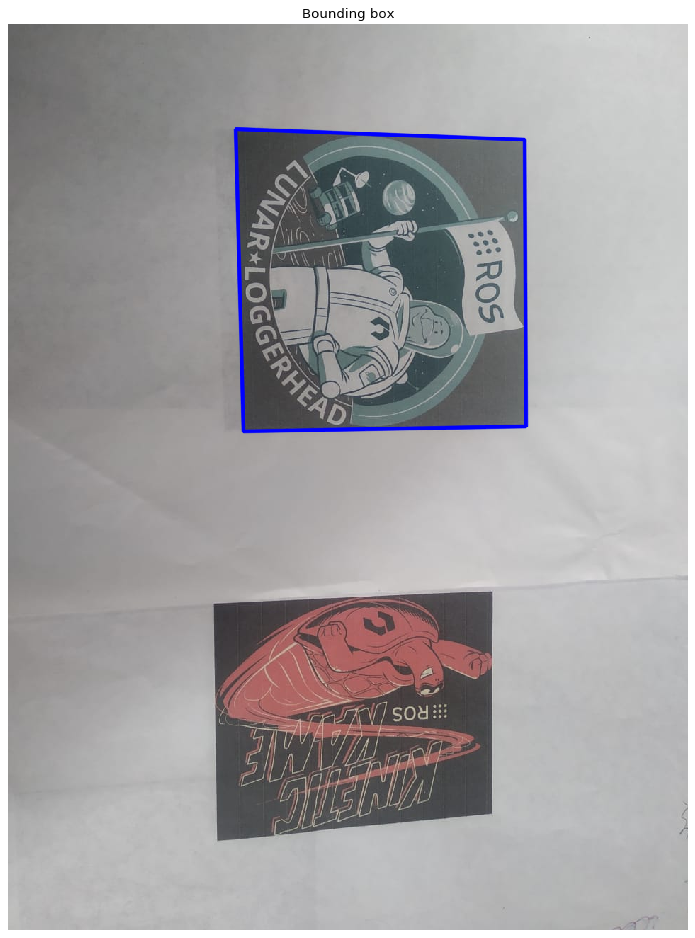

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar ambas imagenes
imgScene  = cv2.imread('imgs/Photo1.jpg')          # Scene
imgObject = cv2.imread('imgs/lunar_sticker_big.png')   # Object
imgObject = cv2.resize(imgObject, None, fx=0.25, fy=0.25)
imgScene  = cv2.cvtColor(imgScene,cv2.COLOR_BGR2RGB)
imgObject = cv2.cvtColor(imgObject,cv2.COLOR_BGR2RGB)

# Mostrar ambas imagenes
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1),plt.imshow(imgScene), plt.title('Escena')
plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(imgObject), plt.title('Objeto')
plt.axis('off') 
plt.show()

# Cambiar a escala de grises para hallar los keypoints
img1_Scene = cv2.cvtColor(imgScene,cv2.COLOR_RGB2GRAY)
img2_Object = cv2.cvtColor(imgObject,cv2.COLOR_RGB2GRAY)

# Se crea el objeto del descriptor
orb = cv2.ORB_create()

# Se calculan los keypoints y las features
kp1_Scene, des1_Scene = orb.detectAndCompute(img1_Scene,None)
kp2_Object, des2_Object = orb.detectAndCompute(img2_Object,None)

# Se dibujan en la imagen los keypoints hallados
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
img1_kp_draw = cv2.drawKeypoints(img1_Scene.copy(), kp1_Scene, None, color=(0,255,0), flags=0)
plt.subplot(1,2,1),plt.imshow(img1_kp_draw), plt.title('Keypoints en escena')
plt.axis('off')

img2_kp_draw = cv2.drawKeypoints(img2_Object.copy(), kp2_Object, None, color=(0,255,0), flags=0)
plt.subplot(1,2,2),plt.imshow(img2_kp_draw), plt.title('Keypoints en objeto')
plt.axis('off') 
 
plt.show()


# Crear el objeto para la comparacion de matrices de caracteristicas
# se utiliza el algoritmo de BruteForce
matcher = cv2.BFMatcher()

# Se comparan los vectores de caracteristicas teniendo en cuenta los dos
# vecinos mas cercanos
matches = matcher.knnMatch(des2_Object, des1_Scene, k=2) 

# Se realiza un recorrido de las parejas de vectores caracteristicas
# para rechazar aquellos que estan demasiado lejos entre si
good = []
FACT_DIST = 0.8
for m,n in matches:
    if m.distance < FACT_DIST*n.distance:
        good.append(m)
        
print("Matches: ", len(good))

# Se organizan de forma que los matches mas parecidos esten al principio
matches_sorted = sorted(good, key = lambda x:x.distance)

# Si el numero de parejas de caracteristicas supera un umbral se halla la matriz
# para despues realizar la transformacion de perspectiva
MIN_MATCH_COUNT = 10
M = None
if len(matches_sorted) > MIN_MATCH_COUNT:
    
    # Se hallan los puntos de los descriptores en las parejas en el objeto
    src_pts = np.float32([ kp2_Object[m.queryIdx].pt for m in matches_sorted ]).reshape(-1,1,2) # Object points
    
    # Se hallan los puntos de los descriptores en las parejas en la escena
    dst_pts = np.float32([ kp1_Scene[m.trainIdx].pt for m in matches_sorted ]).reshape(-1,1,2) # Desired points
    
    # Con los anteriores dos arreglos se procede a calcular la matriz de
    # homografia usando la tecnica RANSAC (Random Sample Consensus) debido 
    # a que los puntos en los arreglos tienen coordenadas atipicas (outliers), 
    # es decir que algunos estan muy lejos del resto.
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
else:
    print("Not enought matches are found")

if (M is not None):
    print("Matriz de transformacion obtenida usando OpenCV: \n", M,"\n")
    
    # Se hallan puntos para realizar la homografia
    h,w = img2_Object.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    #print("Height: ", h, " Width: ", w, " Points: \n", pts)
    
    # Se realiza la homografia o transformacion de perspectiva
    dst = cv2.perspectiveTransform(pts,M)
    
    # La mascara es un arreglo en el cual se encuentran los matches aceptados
    matchesMask = mask.ravel().tolist()
    
    # Se dibujan los matches obtenidos
    img_res = cv2.drawMatches(img1_Scene, kp1_Scene, img2_Object, kp2_Object, matches_sorted, None,matchColor = (0,255,0),
               singlePointColor = None,
               matchesMask = matchesMask, # Dibujar solo inliers
               flags = 2)
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img_res), plt.title('Imagen con matches')
    plt.axis('off') 
    plt.show()
    
    # Se dibuja el bounding box
    img_box = cv2.polylines(imgScene, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)

    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img_box), plt.title('Bounding box')
    plt.axis('off') 
    plt.show()


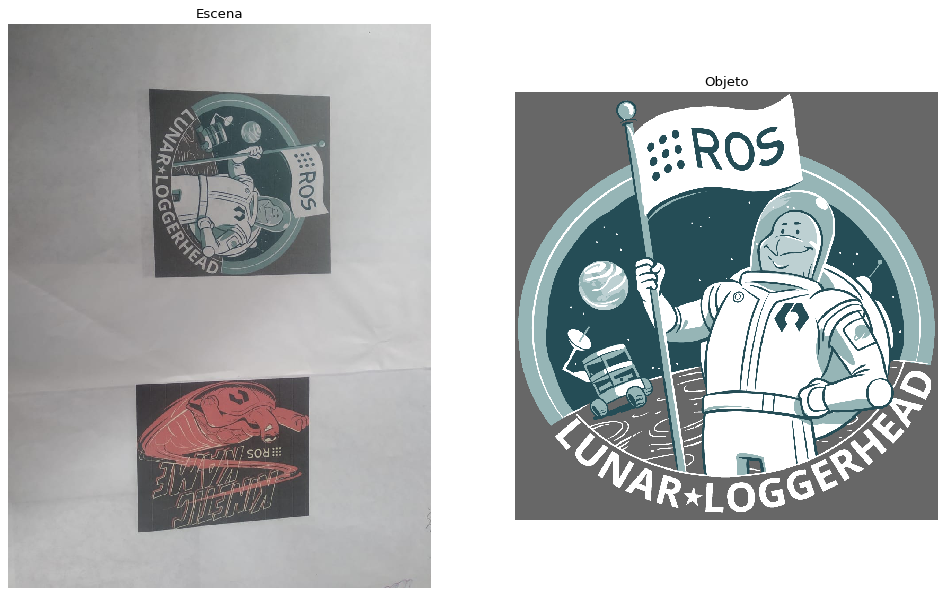

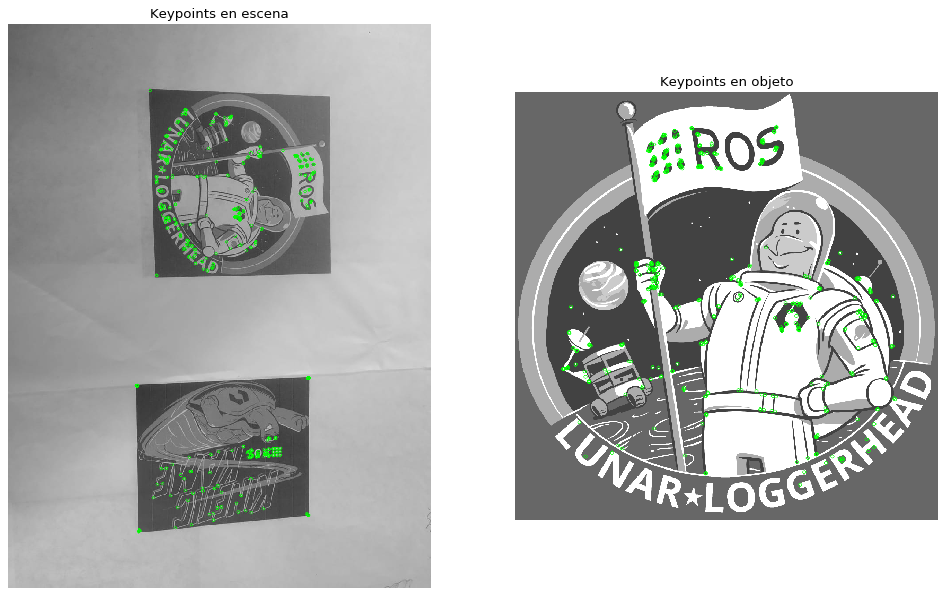

Matches:  156
Matriz de transformacion obtenida usando OpenCV: 
 [[ 2.85133135e-02 -5.31435235e-01  7.29840967e+02]
 [ 5.26852362e-01 -3.06585816e-02  1.63573108e+02]
 [ 3.77240204e-05 -7.30754032e-05  1.00000000e+00]] 

Hight:  808  Width:  798  Points: 
 [[[  0.   0.]]

 [[  0. 807.]]

 [[797. 807.]]

 [[797.   0.]]]
[[[729.84094 163.5731 ]]

 [[319.83392 147.53186]]

 [[333.3331  575.3643 ]]

 [[730.59985 566.4437 ]]]


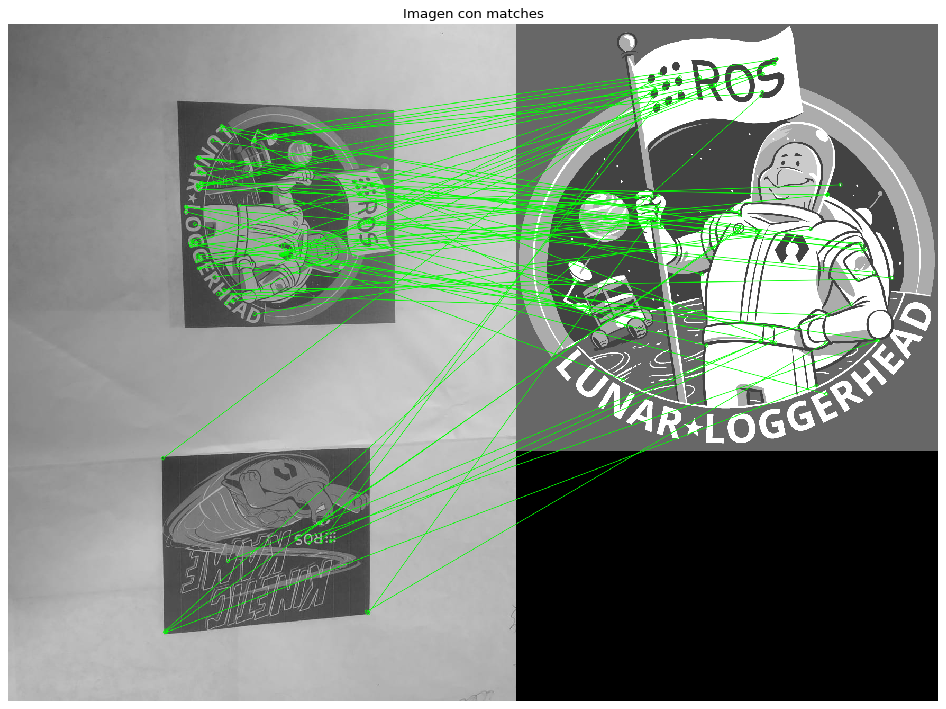

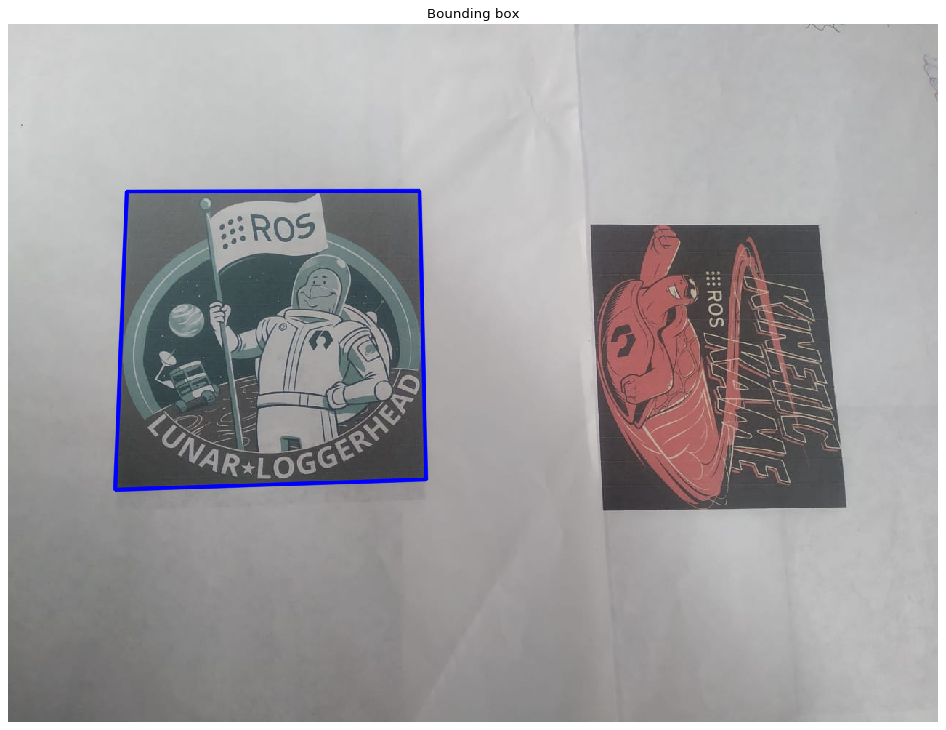

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar ambas imagenes
imgScene  = cv2.imread('imgs/Photo1.jpg')          # Scene
imgObject = cv2.imread('imgs/lunar_sticker_big.png')   # Object
imgObject = cv2.resize(imgObject, None, fx=0.25, fy=0.25)
imgScene  = cv2.cvtColor(imgScene,cv2.COLOR_BGR2RGB)
imgObject = cv2.cvtColor(imgObject,cv2.COLOR_BGR2RGB)

# Mostrar ambas imagenes
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1),plt.imshow(imgScene), plt.title('Escena')
plt.axis('off') 
plt.subplot(1,2,2),plt.imshow(imgObject), plt.title('Objeto')
plt.axis('off') 
plt.show()

# Cambiar a escala de grises para hallar los keypoints
img1_Scene = cv2.cvtColor(imgScene,cv2.COLOR_RGB2GRAY)
img2_Object = cv2.cvtColor(imgObject,cv2.COLOR_RGB2GRAY)

# Se crea el objeto del descriptor
orb = cv2.ORB_create()

# Se calculan los keypoints y las features
kp1_Scene, des1_Scene = orb.detectAndCompute(img1_Scene,None)
kp2_Object, des2_Object = orb.detectAndCompute(img2_Object,None)

# Se dibujan en la imagen los keypoints hallados
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
img1_kp_draw = cv2.drawKeypoints(img1_Scene.copy(), kp1_Scene, None, color=(0,255,0), flags=0)
plt.subplot(1,2,1),plt.imshow(img1_kp_draw), plt.title('Keypoints en escena')
plt.axis('off')

img2_kp_draw = cv2.drawKeypoints(img2_Object.copy(), kp2_Object, None, color=(0,255,0), flags=0)
plt.subplot(1,2,2),plt.imshow(img2_kp_draw), plt.title('Keypoints en objeto')
plt.axis('off') 
 
plt.show()


# Crear el objeto para la comparacion de matrices de caracteristicas
# se utiliza el algoritmo de BruteForce
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # En este caso se utiliza la distancia de Hamming

# Se comparan los vectores de caracteristicas
good = matcher.match(des2_Object, des1_Scene) 
        
print("Matches: ", len(good))

# Se organizan de forma que los matches mas parecidos esten al principio
matches_sorted = sorted(good, key = lambda x:x.distance)

# Si el numero de parejas de caracteristicas supera un umbral se halla la matriz
# para despues realizar la transformacion de perspectiva
MIN_MATCH_COUNT = 10
M = None
if len(matches_sorted) > MIN_MATCH_COUNT:
    
    # Se hallan los puntos de los descriptores en las parejas en el objeto
    src_pts = np.float32([ kp2_Object[m.queryIdx].pt for m in matches_sorted ]).reshape(-1,1,2) # Object points
    
    # Se hallan los puntos de los descriptores en las parejas en la escena
    dst_pts = np.float32([ kp1_Scene[m.trainIdx].pt for m in matches_sorted ]).reshape(-1,1,2) # Desired points
    
    # Con los anteriores dos arreglos se procede a calcular la matriz de
    # homografia usando la tecnica RANSAC (Random Sample Consensus) debido 
    # a que los puntos en los arreglos tienen coordenadas atipicas (outliers), 
    # es decir que algunos estan muy lejos del resto.
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
else:
    print("Not enought matches are found")

if (M is not None):
    print("Matriz de transformacion obtenida usando OpenCV: \n", M,"\n")
    
    # Se hallan puntos para realizar la homografia
    h,w = img2_Object.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    print("Hight: ", h, " Width: ", w, " Points: \n", pts)
    
    # Se realiza la homografia o transformacion de perspectiva
    dst = cv2.perspectiveTransform(pts,M)
    print(dst)
    #dst += (w, 0)  # Se debe añadir el ancho de la imagen original
    
    # La mascara es un arreglo en el cual se encuentran los matches aceptados
    matchesMask = mask.ravel().tolist()
    
    # Se dibujan los matches obtenidos
    img_res = cv2.drawMatches(img1_Scene, kp1_Scene, img2_Object, kp2_Object, matches_sorted, None,matchColor = (0,255,0),
               singlePointColor = None,
               matchesMask = matchesMask, # Dibujar solo inliers
               flags = 2)
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img_res), plt.title('Imagen con matches')
    plt.axis('off') 
    plt.show()
    
    # Se dibuja el bounding box
    img_box = cv2.polylines(imgScene, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)
    img_box = cv2.rotate(img_box, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(img_box), plt.title('Bounding box')
    plt.axis('off') 
    plt.show()
